# 資料清理

In [1]:
import yfinance as yf
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.momentum import StochasticOscillator

# 獲取台積電股票的歷史數據
df = yf.Ticker("8046.TW").history(period="max")

# 計算技術指標
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")

df.info()


C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4694 entries, 2004-05-26 00:00:00+08:00 to 2023-06-02 00:00:00+08:00
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       4694 non-null   float64
 1   High                       4694 non-null   float64
 2   Low                        4694 non-null   float64
 3   Close                      4694 non-null   float64
 4   Volume                     4694 non-null   int64  
 5   Dividends                  4694 non-null   float64
 6   Stock Splits               4694 non-null   float64
 7   volume_adi                 4693 non-null   float64
 8   volume_obv                 4694 non-null   int64  
 9   volume_cmf                 4648 non-null   float64
 10  volume_fi                  4681 non-null   float64
 11  volume_em                  4515 non-null   float64
 12  volume_sma_em              4170 non-null   float64
 13  

In [2]:
# 選擇要保留的指標
selected_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']

# 刪除其他指標
df = df[selected_columns]

# 打印結果
print(df)

                               Open      High       Low     Close    Volume   
Date                                                                          
2004-05-26 00:00:00+08:00   17.3106   17.3106   17.3106   17.3106      1256  \
2004-05-27 00:00:00+08:00   17.3106   17.3106   17.3106   17.3106         0   
2004-05-28 00:00:00+08:00   17.3106   17.3106   17.3106   17.3106         0   
2004-05-31 00:00:00+08:00   17.3106   17.3106   17.3106   17.3106         0   
2004-06-01 00:00:00+08:00   17.3106   17.3106   17.3106   17.3106         0   
...                             ...       ...       ...       ...       ...   
2023-05-29 00:00:00+08:00  309.0000  313.0000  297.0000  302.5000  12260389   
2023-05-30 00:00:00+08:00  301.0000  302.0000  293.5000  294.0000   9054111   
2023-05-31 00:00:00+08:00  295.5000  303.0000  295.5000  303.0000   7851822   
2023-06-01 00:00:00+08:00  301.5000  303.5000  297.0000  298.5000   5589398   
2023-06-02 00:00:00+08:00  303.0000  309.0000  300.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4694 entries, 2004-05-26 00:00:00+08:00 to 2023-06-02 00:00:00+08:00
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             4694 non-null   float64
 1   High             4694 non-null   float64
 2   Low              4694 non-null   float64
 3   Close            4694 non-null   float64
 4   Volume           4694 non-null   int64  
 5   trend_macd_diff  4661 non-null   float64
 6   trend_ema_fast   4683 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 293.4 KB


In [4]:
# 將索引視為日期欄位
df['Date'] = df.index

# 將"Date"欄位移至第一欄
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']]


# 計算KD值
KD = ta.momentum.StochasticOscillator(
    close=df['Close'],
    high=df['High'],
    low=df['Low'],
    window=14,
    smooth_window=3,
    fillna=False
)
df['KD'] = KD.stoch()  # 取得KD值的陣列

# 使用ta套件中的RSIIndicator指標計算RSI值
rsi = ta.momentum.RSIIndicator(
    close=df['Close'],
    window=14,
    fillna=False
).rsi()

# 將計算出的RSI值合併到原始DataFrame中
df['RSI'] = rsi

# 過濾出2022年到2023年2月的資料
start_date = '2022-01-01'
end_date = '2023-02-28'
dfmodel = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]




df = df.round(3) 

df = df.reset_index(drop=True)

print(dfmodel)

                                               Date        Open        High   
Date                                                                          
2022-01-03 00:00:00+08:00 2022-01-03 00:00:00+08:00  558.999986  574.447308  \
2022-01-04 00:00:00+08:00 2022-01-04 00:00:00+08:00  574.447301  576.378216   
2022-01-05 00:00:00+08:00 2022-01-05 00:00:00+08:00  564.792771  575.412806   
2022-01-06 00:00:00+08:00 2022-01-06 00:00:00+08:00  564.792768  567.689141   
2022-01-07 00:00:00+08:00 2022-01-07 00:00:00+08:00  555.138184  558.034557   
...                                             ...         ...         ...   
2023-02-20 00:00:00+08:00 2023-02-20 00:00:00+08:00  246.000000  249.000000   
2023-02-21 00:00:00+08:00 2023-02-21 00:00:00+08:00  245.000000  248.000000   
2023-02-22 00:00:00+08:00 2023-02-22 00:00:00+08:00  244.000000  245.000000   
2023-02-23 00:00:00+08:00 2023-02-23 00:00:00+08:00  240.000000  244.000000   
2023-02-24 00:00:00+08:00 2023-02-24 00:00:00+08:00 

In [5]:
dfmodel.tail(60)

,Date,Open,High,Low,Close,Volume,trend_macd_diff,trend_ema_fast,KD,RSI
Date,,,,,,,,,,
2022-11-22 00:00:00+08:00,2022-11-22 00:00:00+08:00,261.5,263.5,257.0,262.0,9257091,3.101361,251.551872,75.539568,67.288383
2022-11-23 00:00:00+08:00,2022-11-23 00:00:00+08:00,264.5,266.0,259.0,259.0,8348915,2.060218,252.697738,71.223022,64.724206
2022-11-24 00:00:00+08:00,2022-11-24 00:00:00+08:00,261.0,270.0,259.0,270.0,12028735,1.887346,255.359624,86.466165,69.338058
2022-11-25 00:00:00+08:00,2022-11-25 00:00:00+08:00,271.0,278.0,270.0,271.0,16053056,1.625275,257.765836,87.096774,69.725719
2022-11-28 00:00:00+08:00,2022-11-28 00:00:00+08:00,267.0,275.0,266.5,273.0,8017947,1.381147,260.109554,89.285714,70.528271
2022-11-29 00:00:00+08:00,2022-11-29 00:00:00+08:00,271.0,271.0,265.0,267.0,8667373,0.647373,261.169622,75.757576,64.964356
2022-11-30 00:00:00+08:00,2022-11-30 00:00:00+08:00,265.5,271.0,265.0,269.5,5805746,0.186139,262.451219,60.416667,66.162180
2022-12-01 00:00:00+08:00,2022-12-01 00:00:00+08:00,281.5,296.0,280.5,286.5,27052999,0.844838,266.151031,76.829268,72.937683
2022-12-02 00:00:00+08:00,2022-12-02 00:00:00+08:00,284.5,295.5,284.0,295.5,13500685,1.658493,270.666257,98.750000,75.710585


# 模型建構

### SVR

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta

# SVR
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]
C_values = [0.1, 1.0, 10.0]
epsilon_values = [0.1, 0.2, 0.5]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for C in C_values:
        for epsilon in epsilon_values:
            model = SVR(C=C, epsilon=epsilon)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((C, epsilon, avg_score))
    
    # 選擇最佳參數
    best_C, best_epsilon, _ = min(scores, key=lambda x: x[2])
    
    model = SVR(C=best_C, epsilon=best_epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.1
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'C': best_C, 'epsilon': best_epsilon}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_SVR = SVR(C=best_params['C'], epsilon=best_params['epsilon'])
model_SVR.fit(X, y)


最佳参数: {'ratio': 20, 'C': 10.0, 'epsilon': 0.1}
最佳相对误差: 0.0 %


SVR(C=10.0)

In [7]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_SVR = model_SVR.predict(input_data)

# 印出預測結果
print(predictions_SVR)

[247.34143328 265.189922   258.73378982 265.61811008 244.96706913
 243.88258317 268.3670589  263.0886128  288.96559619 260.62667036
 242.32588711 250.48159011 242.08734661 260.62391493 242.58185054
 242.29179295 271.28808079 242.62848597 245.78513764 273.67351825
 246.4772199  242.72987011 260.63300144 250.78945617 243.27957063
 253.36848788 303.74990466 292.12502411 292.16822455 273.97494723
 287.04511894 283.57385934 243.05704744 242.19762177 251.010618
 245.71718275 276.29596207 275.83449826 294.2159355  247.78987252
 279.18805881 298.92978361 247.32006662 281.88635303 242.45606102
 242.45645023 247.46728571 242.48988507 282.83834914 291.58980719
 305.64164601 290.38698441 304.47558016 296.36480458 273.55997742
 269.62687625 309.88928409 306.23598439 312.44734271 298.56685485
 304.53404401 278.1396405 ]


In [8]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_SVR = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_SVR = selected_data_SVR[['Date']]

selected_data_SVR['predictions_SVR'] = predictions_SVR

# 打印结果
print(selected_data_SVR)




                          Date  predictions_SVR
4630 2023-03-01 00:00:00+08:00       247.341433
4631 2023-03-02 00:00:00+08:00       265.189922
4632 2023-03-03 00:00:00+08:00       258.733790
4633 2023-03-06 00:00:00+08:00       265.618110
4634 2023-03-07 00:00:00+08:00       244.967069
...                        ...              ...
4687 2023-05-25 00:00:00+08:00       306.235984
4688 2023-05-26 00:00:00+08:00       312.447343
4689 2023-05-29 00:00:00+08:00       298.566855
4690 2023-05-30 00:00:00+08:00       304.534044
4691 2023-05-31 00:00:00+08:00       278.139641

[62 rows x 2 columns]


In [9]:
# 找到最低值和最高值的索引
min_index = selected_data_SVR['predictions_SVR'].idxmin()
max_index = selected_data_SVR['predictions_SVR'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_SVR.loc[min_index, 'Date']
max_date = selected_data_SVR.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_SVR.loc[min_index, 'predictions_SVR']
max_value = selected_data_SVR.loc[max_index, 'predictions_SVR']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-03-17 00:00:00+08:00
最低值： 242.08734660865923
最高值日期： 2023-05-26 00:00:00+08:00
最高值： 312.4473427077496


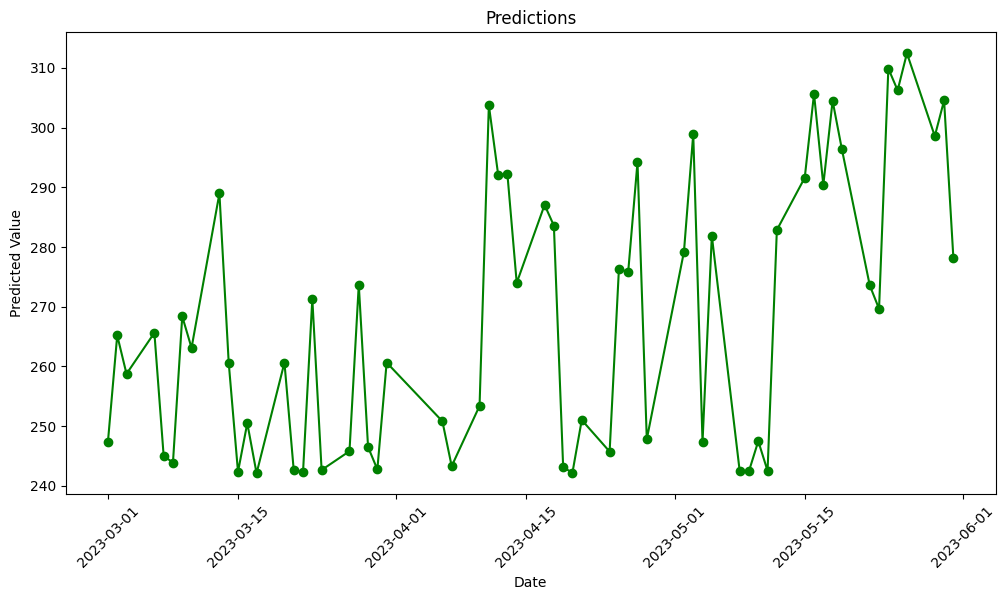

In [10]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()

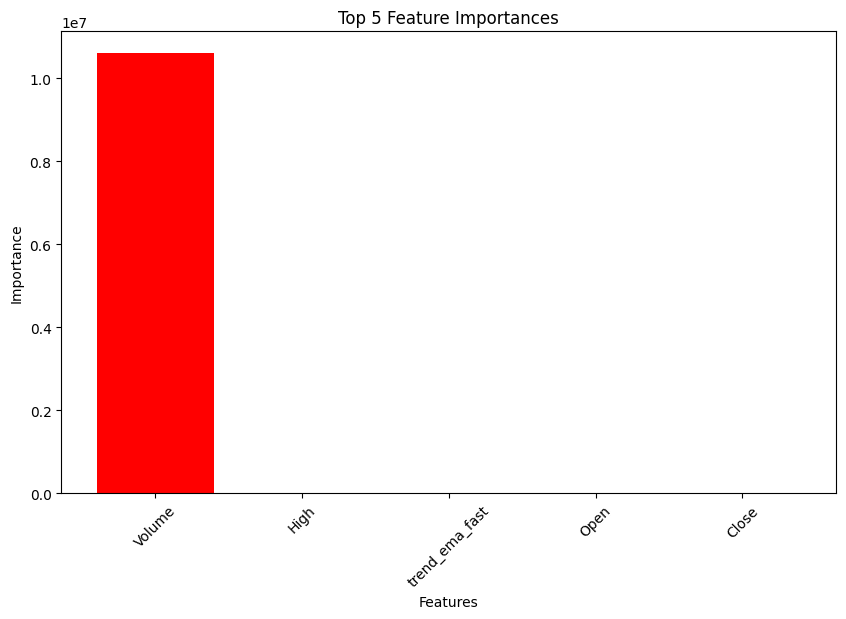

In [11]:
# 獲取支持向量（SV）的索引
support_vector_indices = model_SVR.support_

# 獲取支持向量對應的特徵
support_vectors = X.iloc[support_vector_indices]

# 計算支持向量的平均值作為特徵重要性
feature_importances = support_vectors.mean()

# 將特徵重要性排序
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# 取前N個重要特徵
top_n = 5
top_features = feature_importances_sorted.index[:top_n]
top_importances = feature_importances_sorted.values[:top_n]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


### randomforest

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import datetime
from dateutil.relativedelta import relativedelta

# Random Forest
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(5, 100, 5)]
n_estimator_values = [i for i in range(100, 250, 50)]
max_depth_values = [i for i in range(1, 5)]
min_samples_leaf_values = [i for i in range(1, 5)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    for max_depth in max_depth_values:
        for min_samples_leaf in min_samples_leaf_values:
            for n_estimators in n_estimator_values:
                model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=2023)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                average_value = np.mean(y_test)
                relative_error = (mse / average_value) * 100
                if relative_error < best_relative_error:
                    best_relative_error = relative_error
                    best_params = {'ratio': ratio, 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error,'%')

# 將模型命名為 model
model_RF = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                              max_depth=best_params['max_depth'],
                              min_samples_leaf=best_params['min_samples_leaf'],
                              random_state=2023)
model_RF.fit(X, y)




最佳参数: {'ratio': 90, 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 1}
最佳相对误差: 0.6048120940282192 %


RandomForestRegressor(max_depth=4, n_estimators=200, random_state=2023)

In [13]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-15':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_RF = model_RF.predict(input_data)

# 印出預測結果
print(predictions_RF)

[258.00329105 259.66550563 259.8713885  258.51001435 272.842532
 273.0852962  273.39640106 269.74969766 273.01900399 285.76300822
 296.92983018 302.59713755 302.35056583 275.9035082  284.83407528
 277.90766079 277.53692658 273.01900399 273.67873897 273.67873897
 259.1649677  257.84104465 243.28344897 236.09913278 243.40523535
 243.34267872 236.09913278 238.8864148  232.29383327 232.05790153
 231.10292245 233.02609298 226.12027938 217.47213766 229.35090868
 235.02368322 235.27111822 233.58053936 232.59378482 231.94455282
 233.19062869 233.72101631 243.92795488 243.52349145 257.30437992
 263.63323925 257.62870257 239.82943318 243.57839219 243.57839219
 243.52349145 236.09913278 233.19062869 239.20779826 243.57839219
 243.99374941 243.92795488 243.57839219 243.99374941 242.46983471
 243.52349145 234.03388691]


In [14]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_RF = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_RF = selected_data_RF[['Date']]

selected_data_RF['predictions_RF'] = predictions_RF

# 打印结果
print(selected_data_RF)


                          Date  predictions_RF
4630 2023-03-01 00:00:00+08:00      258.003291
4631 2023-03-02 00:00:00+08:00      259.665506
4632 2023-03-03 00:00:00+08:00      259.871389
4633 2023-03-06 00:00:00+08:00      258.510014
4634 2023-03-07 00:00:00+08:00      272.842532
...                        ...             ...
4687 2023-05-25 00:00:00+08:00      243.578392
4688 2023-05-26 00:00:00+08:00      243.993749
4689 2023-05-29 00:00:00+08:00      242.469835
4690 2023-05-30 00:00:00+08:00      243.523491
4691 2023-05-31 00:00:00+08:00      234.033887

[62 rows x 2 columns]


In [15]:
# 找到最低值和最高值的索引
min_index = selected_data_RF['predictions_RF'].idxmin()
max_index = selected_data_RF['predictions_RF'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_RF.loc[min_index, 'Date']
max_date = selected_data_RF.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_RF.loc[min_index, 'predictions_RF']
max_value = selected_data_RF.loc[max_index, 'predictions_RF']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)

最低值日期： 2023-04-20 00:00:00+08:00
最低值： 217.4721376632746
最高值日期： 2023-03-16 00:00:00+08:00
最高值： 302.5971375548249


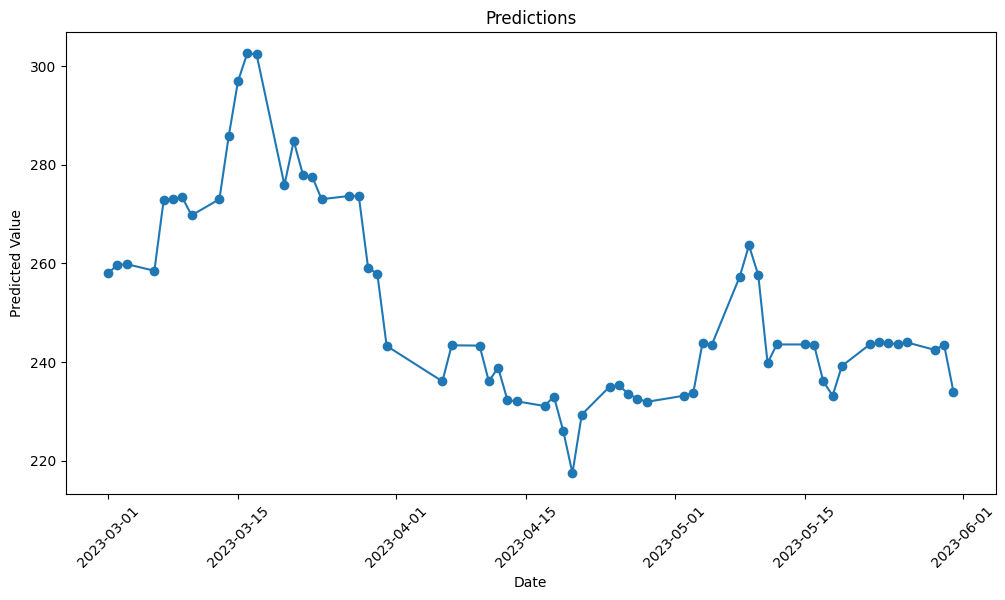

In [16]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



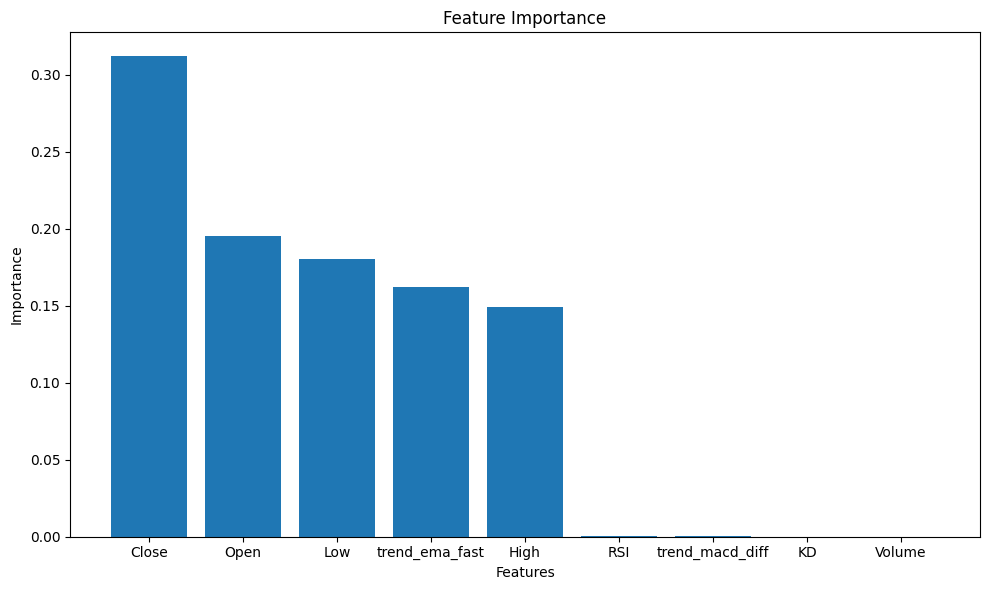

In [17]:
#看那些特徵比較重要，然後輸出前n重要的特徵

feature_importances = model_RF.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# 繪製長條圖
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names,)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### XGBoost

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta


# XGBoost
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for max_depth in range(3, 7):
        for learning_rate in [0.1, 0.01]:
            model = xgb.XGBRegressor(max_depth=max_depth, learning_rate=learning_rate)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((max_depth, learning_rate, avg_score))
    
    # 選擇最佳參數
    best_max_depth, best_learning_rate, _ = min(scores, key=lambda x: x[2])
    
    model = xgb.XGBRegressor(max_depth=best_max_depth, learning_rate=best_learning_rate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.00001
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'max_depth': best_max_depth, 'learning_rate': best_learning_rate}

print("最佳參數:", best_params)
print("最佳相對誤差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_XG = xgb.XGBRegressor(max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'])
model_XG.fit(X, y)

最佳參數: {'ratio': 20, 'max_depth': 3, 'learning_rate': 0.01}
最佳相對誤差: 0.0 %


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_XG = model_XG.predict(input_data)

# 印出預測結果
print(predictions_XG)

[164.72876 166.84676 166.84676 165.46251 166.84676 166.84676 166.84676
 166.84676 166.84676 173.6912  180.88657 194.27534 189.1532  167.86763
 173.6912  169.77072 169.77072 166.84676 166.84676 166.84676 166.40196
 163.9385  154.72435 151.90822 155.01807 155.01807 151.90822 152.54207
 149.24597 148.99426 145.95976 150.46513 142.19537 139.3782  146.25212
 151.51659 151.90822 150.69102 149.73424 148.20761 150.46513 150.69102
 155.95111 155.01807 162.84212 166.84676 162.56053 152.78944 155.01807
 155.01807 155.01807 151.90822 150.46513 152.78944 155.01807 156.54431
 155.67567 155.01807 156.34715 153.62016 155.01807 150.69102]


In [20]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_XG = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_XG = selected_data_XG[['Date']]

selected_data_XG['predictions_XG'] = predictions_XG

# 打印结果
print(selected_data_XG)




                          Date  predictions_XG
4630 2023-03-01 00:00:00+08:00      164.728760
4631 2023-03-02 00:00:00+08:00      166.846756
4632 2023-03-03 00:00:00+08:00      166.846756
4633 2023-03-06 00:00:00+08:00      165.462509
4634 2023-03-07 00:00:00+08:00      166.846756
...                        ...             ...
4687 2023-05-25 00:00:00+08:00      155.018066
4688 2023-05-26 00:00:00+08:00      156.347153
4689 2023-05-29 00:00:00+08:00      153.620163
4690 2023-05-30 00:00:00+08:00      155.018066
4691 2023-05-31 00:00:00+08:00      150.691025

[62 rows x 2 columns]


In [21]:
# 找到最低值和最高值的索引
min_index = selected_data_XG['predictions_XG'].idxmin()
max_index = selected_data_XG['predictions_XG'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_XG.loc[min_index, 'Date']
max_date = selected_data_XG.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_XG.loc[min_index, 'predictions_XG']
max_value = selected_data_XG.loc[max_index, 'predictions_XG']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-04-20 00:00:00+08:00
最低值： 139.3782
最高值日期： 2023-03-16 00:00:00+08:00
最高值： 194.27534


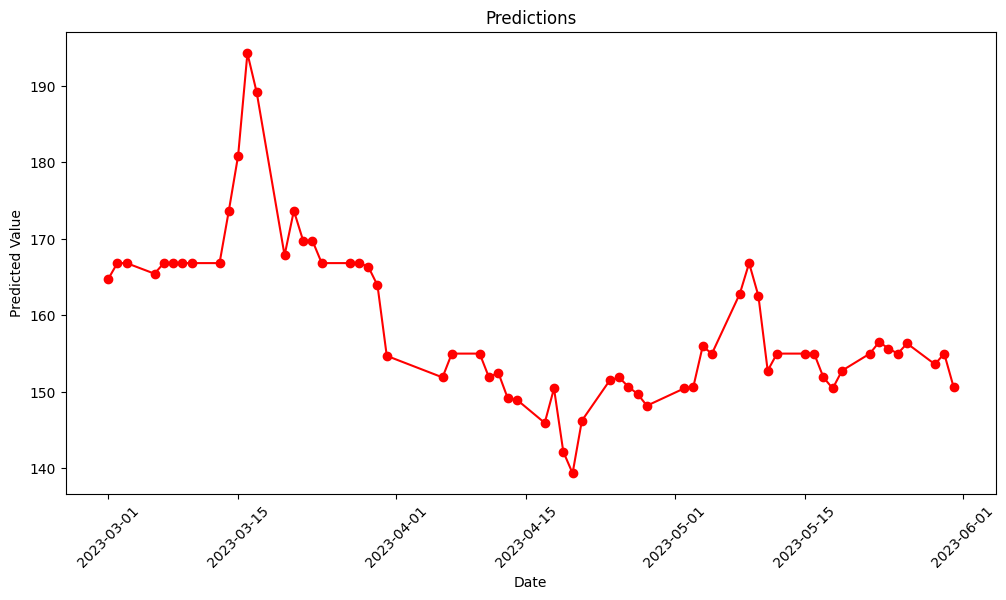

In [22]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



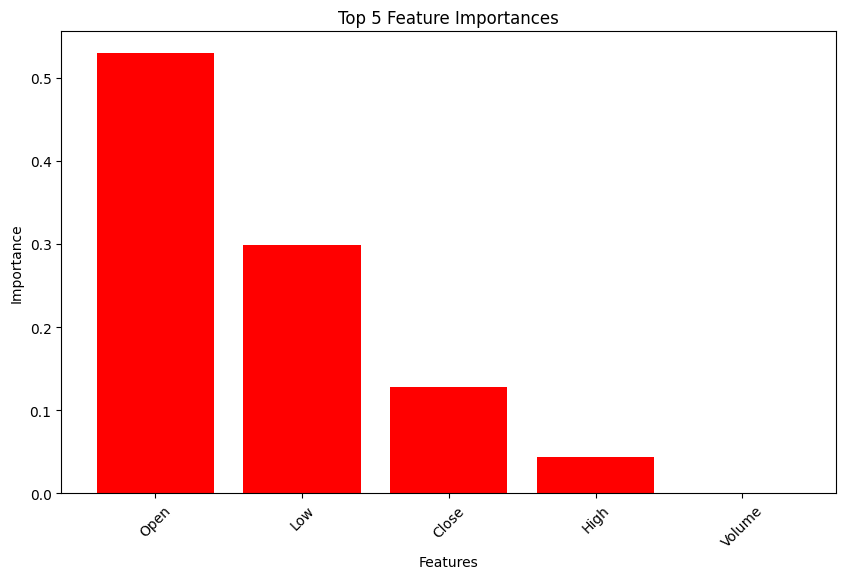

In [23]:
# 獲取特徵重要性
feature_importances = model_XG.feature_importances_

# 獲取特徵名稱
feature_names = X.columns

# 將特徵重要性與特徵名稱進行配對並排序
feature_importances_sorted = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# 取前N個重要特徵
top_n = 5
top_features = [f for f, _ in feature_importances_sorted[:top_n]]
top_importances = [imp for _, imp in feature_importances_sorted[:top_n]]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


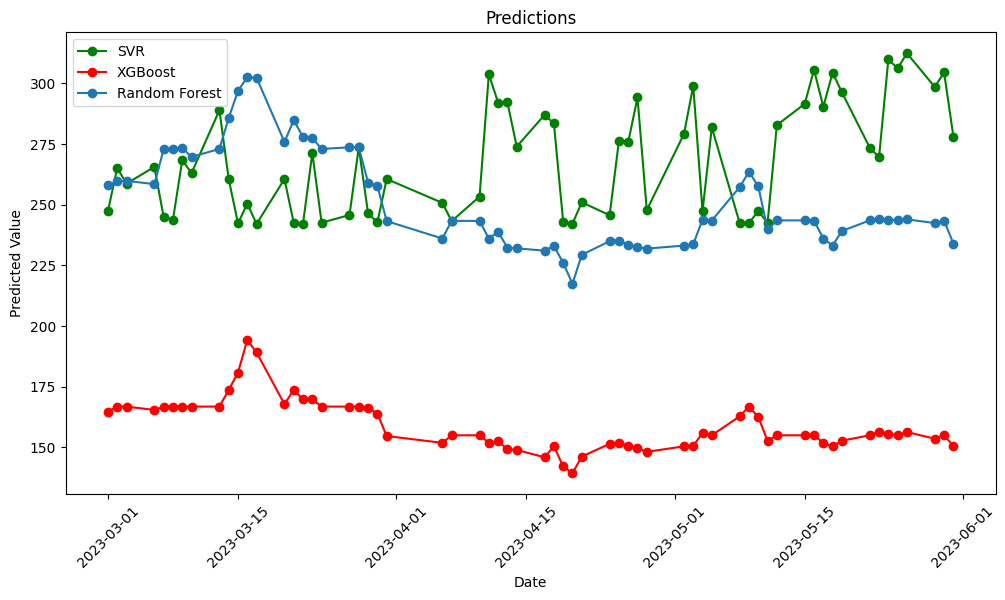

In [24]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green', label='SVR')
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red', label='XGBoost')
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o', label='Random Forest')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置图例
plt.legend()

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()
